# Mutation Differentials
This notebook analyzes how mutations change in prevalance within phenotype space.

In [1]:
%matplotlib inline

import microbepy
import microbepy.common
from microbepy.common import constants as cn
from microbepy.common import util
from microbepy.common import isolate
from microbepy.statistics.mutation_differential import MutationDifferential
from microbepy.common.range_constraint import RangeConstraint
from microbepy.common.study_context import nextStudyContext
from microbepy.plot.util_plot import PlotParms
from microbepy.correlation.mutation_collection import MutationCollection
from microbepy.plot.mutation_plot import MutationIsolatePlot, MutationLinePlot

import copy
import numpy as np
import pandas as pd

## Basic Mutation Analysis

### Isolate Mutations

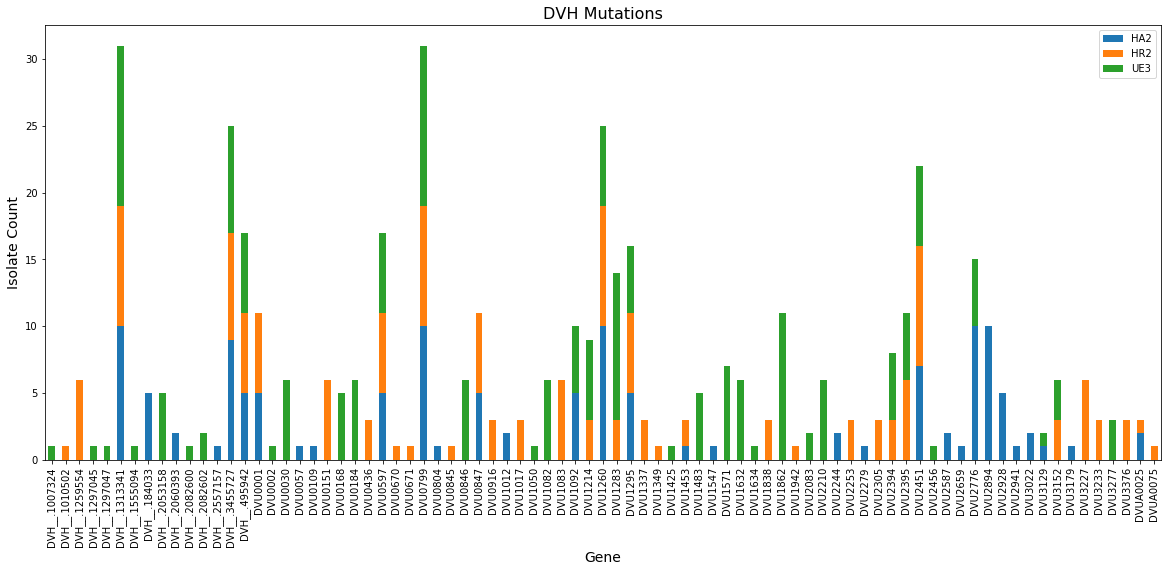

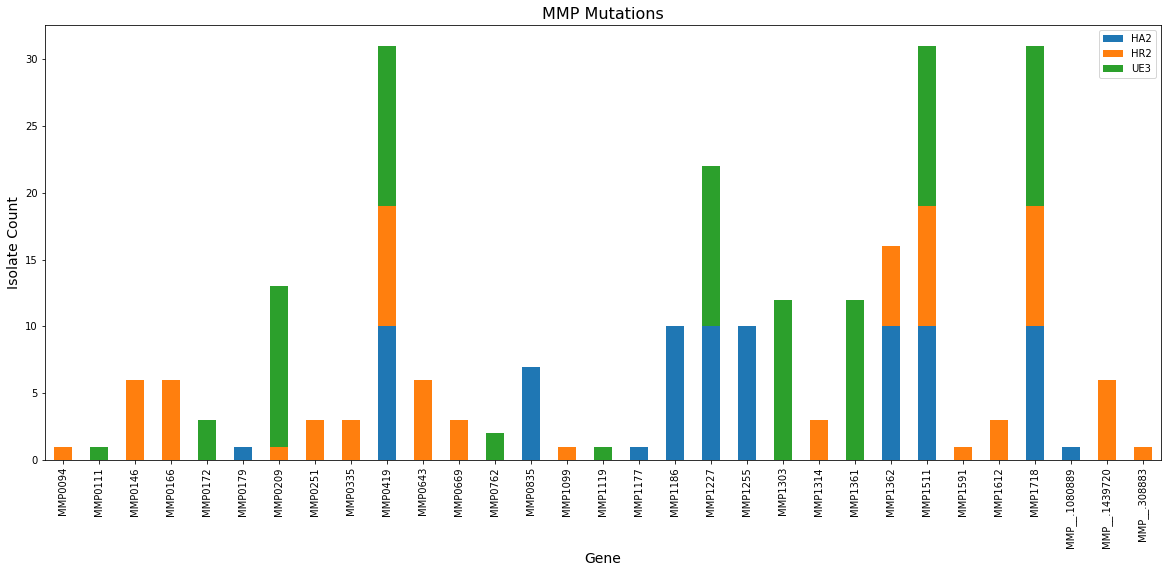

In [2]:
# Mutations for isolates

mutation_plot = MutationIsolatePlot(mutation_column=cn.GGENE_ID)
mutation_plot.plot(cn.SPECIES_MIX_DVH)
mutation_plot.plot(cn.SPECIES_MIX_MMP)

### Line Mutations

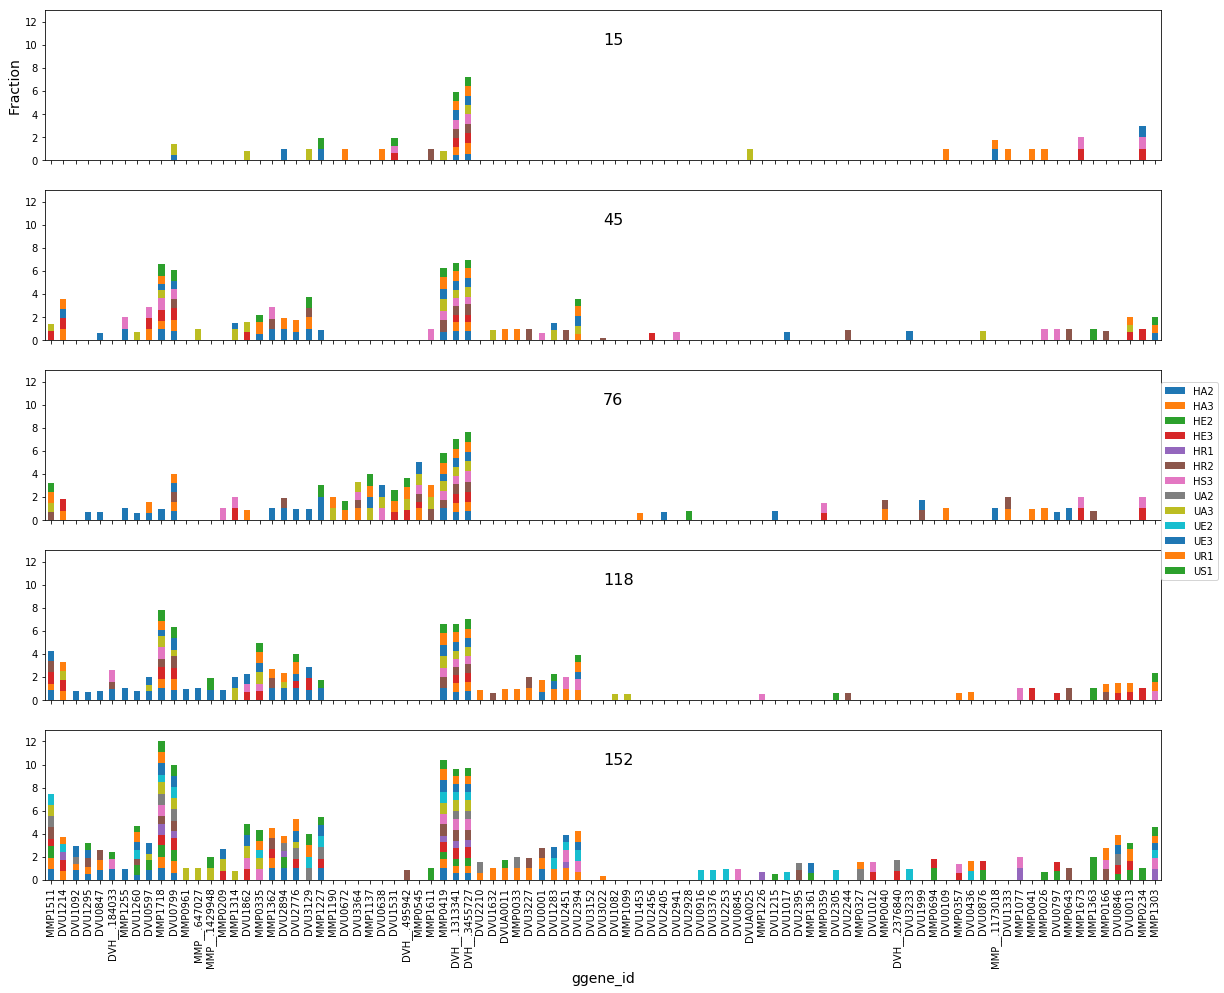

In [3]:
parms = PlotParms()
parms[cn.PLT_FIGSIZE] = [20, 16]
mutation_plot = MutationLinePlot(mutation_column=cn.GGENE_ID)
mutation_plot.plotTransfers(parms=parms)

Observations
1. There are several lines that have identical initial conditions, suggesting that comparisons can be made in erms of evolutionary outcomes.
1. Can try to manually correlate MMP and DVH mutations.For example, is MMP0419 a response to DVH first intergeneic mutation?
1. Plot number of multi-line mutations over time for DVH and MMP. Consider thresholds of at least 2 lines and at least 3 lines.
1. Why are there more lines for MMP than DVH?
1. Can the presence of a mutation in later generations be predicted based on earlier generations?

In [4]:
# Mutation fractions by line

In [5]:
# Compare mutations of isolates with standardized rate < 0 with the mutations in isolates with rate > 0 in line
def makeDFForLine(line, depvar=cn.RATE, separation=0.0, is_median=False):
    rc_low = RangeConstraint(lower=-10, upper=-separation/2.0)
    rc_high = RangeConstraint(lower=separation/2.0, upper=10)
    if line == cn.LINE_ALL:
        constraints = []
    else:
        constraints = [lambda r: r[cn.LINE] == line]
    differential = MutationDifferential(depvar, cn.GGENE_ID,
        constraints=constraints,
        is_median=is_median, is_standardize_by_line=True,
        rc_low=rc_low, rc_high=rc_high)
    return differential.makeDF()

In [6]:
# count1: count of occurrences in values of low phenotype
# count2: count in high phenotype
# value: cumulative significance level
for line in cn.LINE_CIS:
    print("\n\n%s\n" % line)
    print (makeDFForLine(line, separation=0, is_median=True))



HA2

               count1  count2    siglvl     value
mutation                                         
MMP0835           2.0     5.0  0.083333  0.083333
DVUA0025          0.0     2.0  0.222222  0.287037
DVU2587           2.0     0.0  0.222222  0.445473
DVU3022           2.0     0.0  0.222222  0.568701
DVU0597           3.0     2.0  0.500000  0.784351
DVH__.184033      3.0     2.0  0.500000  0.892175
DVU1295           3.0     2.0  0.500000  0.946088
DVH__.495942      2.0     3.0  0.500000  0.973044
DVU0001           3.0     2.0  0.500000  0.986522
DVU2928           2.0     3.0  0.500000  0.993261
DVU1092           3.0     2.0  0.500000  0.996630
DVU0847           3.0     2.0  0.500000  0.998315
DVU2659           0.0     1.0  0.500000  0.999158
DVU2451           3.0     4.0  0.500000  0.999579
DVU3129           1.0     0.0  0.500000  0.999789
DVU3179           1.0     0.0  0.500000  0.999895
MMP0179           0.0     1.0  0.500000  0.999947
MMP1177           1.0     0.0  0.500000  0.

In [7]:
for line in cn.LINE_CIS:
    print("\n\n%s\n" % line)
    print (makeDFForLine(line, depvar=cn.YIELD, separation=0, is_median=False))



HA2

               count1  count2    siglvl     value
mutation                                         
DVU2587           2.0     0.0  0.066667  0.066667
DVU2928           0.0     5.0  0.083333  0.144444
DVH__.184033      3.0     2.0  0.083333  0.215741
DVU1295           3.0     2.0  0.083333  0.281096
DVU1092           3.0     2.0  0.083333  0.341004
DVU0847           3.0     2.0  0.083333  0.395921
DVH__.495942      0.0     5.0  0.083333  0.446261
DVU0001           3.0     2.0  0.083333  0.492406
DVU0597           3.0     2.0  0.083333  0.534705
DVU2451           1.0     6.0  0.183333  0.620009
MMP0835           1.0     6.0  0.183333  0.689674
DVU0057           1.0     0.0  0.300000  0.782772
DVU2279           1.0     0.0  0.300000  0.847940
DVU0109           1.0     0.0  0.300000  0.893558
DVU1012           1.0     1.0  0.533333  0.950327
DVH__.2060393     1.0     1.0  0.533333  0.976819
DVU3022           1.0     1.0  0.533333  0.989182
DVU2244           1.0     1.0  0.533333  0.

In [8]:
for depvar in cn.DEPVARS:
    line = cn.LINE_ALL
    print("\n\n%s\n" % depvar)
    print (makeDFForLine(line, depvar=depvar, separation=0, is_median=True))



rate

               count1  count2    siglvl     value
mutation                                         
DVU1214           8.0     1.0  0.007749  0.007749
DVU0846           0.0     6.0  0.008837  0.016518
DVU0184           0.0     6.0  0.008837  0.025209
DVU0597           5.0    12.0  0.015976  0.040782
DVU0168           0.0     5.0  0.021691  0.061588
DVU1483           0.0     5.0  0.021691  0.081943
DVH__.2053158     0.0     5.0  0.021691  0.101857
DVU1295           5.0    11.0  0.037799  0.135805
DVU2451           9.0    14.0  0.056693  0.184799
DVU2210           5.0     1.0  0.085960  0.254873
DVU1082           5.0     1.0  0.085960  0.318924
DVU0030           5.0     1.0  0.085960  0.377469
DVU3152           1.0     5.0  0.085960  0.430982
DVU1260          11.0    15.0  0.085960  0.479894
DVU1632           5.0     1.0  0.085960  0.524603
DVU0916           3.0     0.0  0.112903  0.578276
MMP0172           3.0     0.0  0.112903  0.625890
DVU3277           0.0     3.0  0.112903  0

Observations
1. Note that larger values of rate phenotype seem to be correlated with EPD (from database queries) for UE3

## To Do
1. Summarize significant results in tables with protein descriptions
1. Plot results in phenotype space
   1. UE3 rate - 3 significant
   1. HR2 yield - 2 significant
1. Research the proteins

# Knob Analysis
1. can see all non-universal mutations by using max_sl = 0.99
1. do plots at 0.05 and 0.99 for rate, yield, average & median. Show contrast between separation provided by small and large significance levels.
1. some seem that they should be significant based on the counts

In [9]:
def plotKnobSL(max_sl, is_legend=True):
    specification = {cn.DEPVAR: cn.DEPVARS, cn.LINE: cn.LINE_CIS}
    for context in nextStudyContext(specification=specification):
        constraints = [lambda r: r[cn.LINE] == context.line]
        differential = MutationDifferential(context.depvar, cn.GGENE_ID,
            constraints=constraints,
            is_median=True,
            is_standardize_by_line = True,
            )   
        parms = PlotParms()
        if not is_legend:
            parms[cn.PLT_LEGEND] = ""
        parms[cn.PLT_TITLE] = "%s, %s" % (context.line, context.depvar)
        differential.scatterKnob(parms=parms, is_plot=True, max_sl=max_sl)

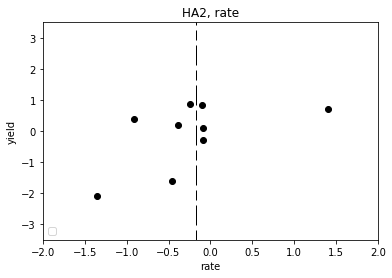

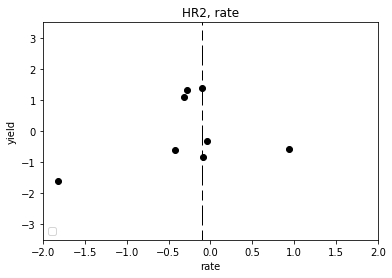

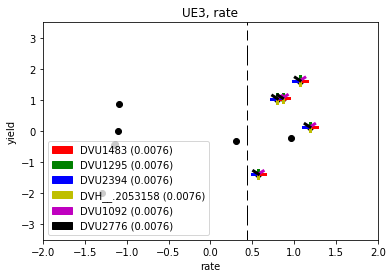

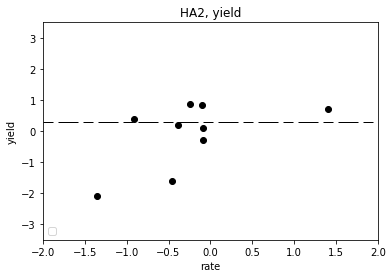

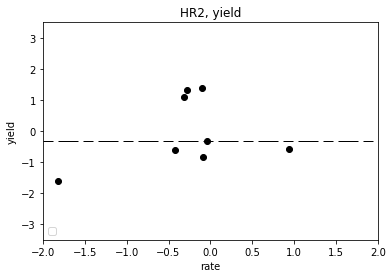

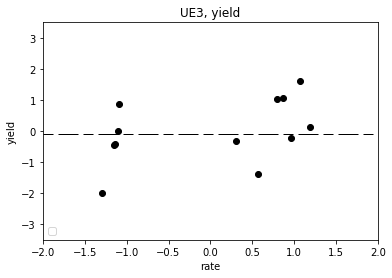

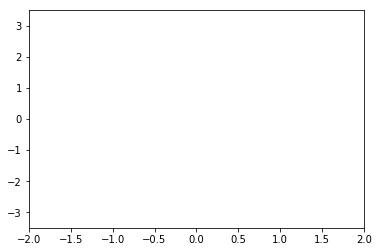

In [10]:
plotKnobSL(0.05)

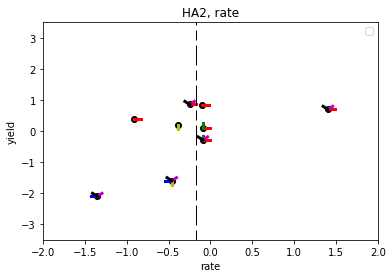

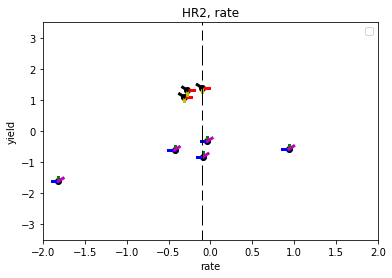

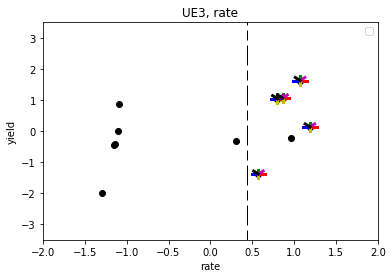

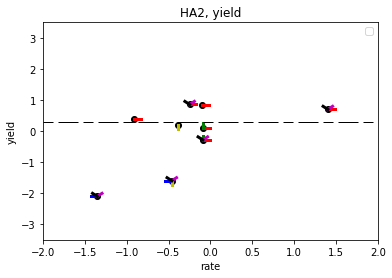

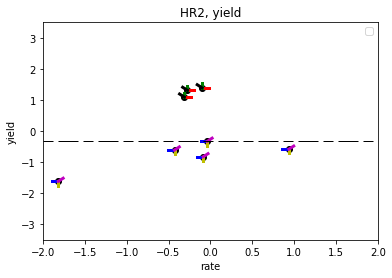

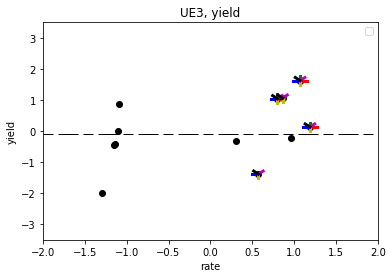

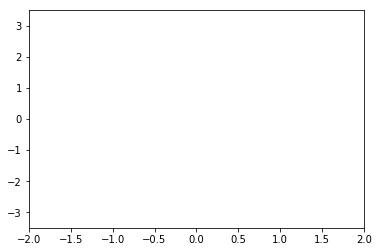

In [11]:
plotKnobSL(0.95, is_legend=False)

# Mutation Groups
Find mutations that only occur in an isolate if the entire group is present

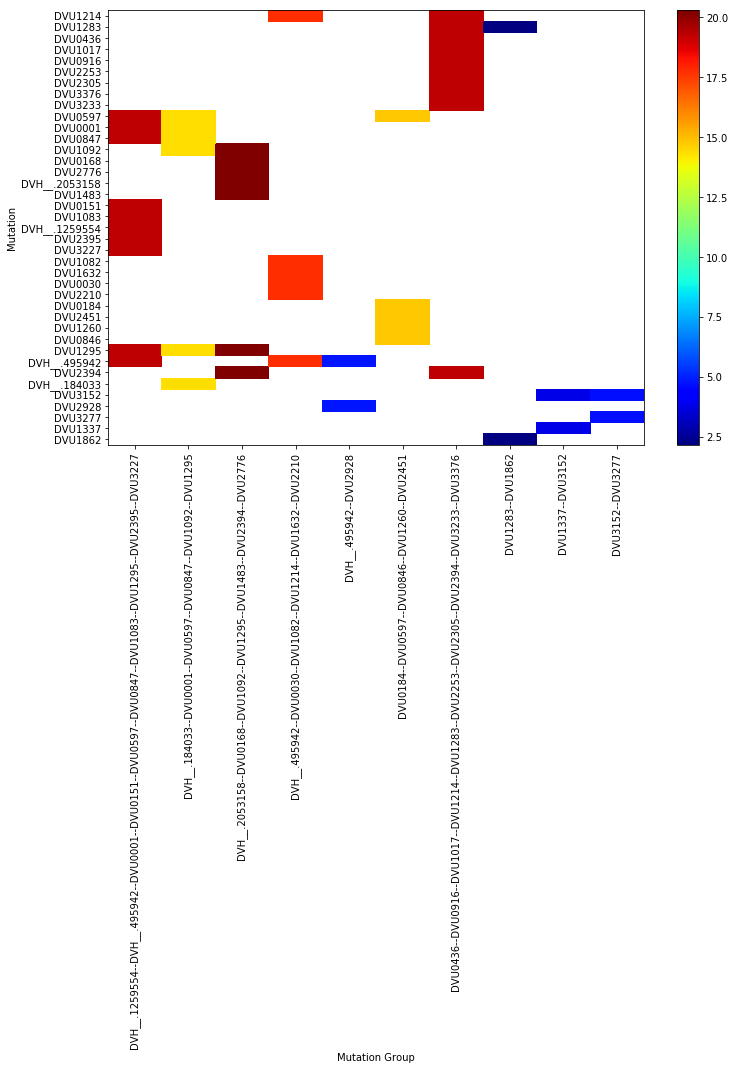

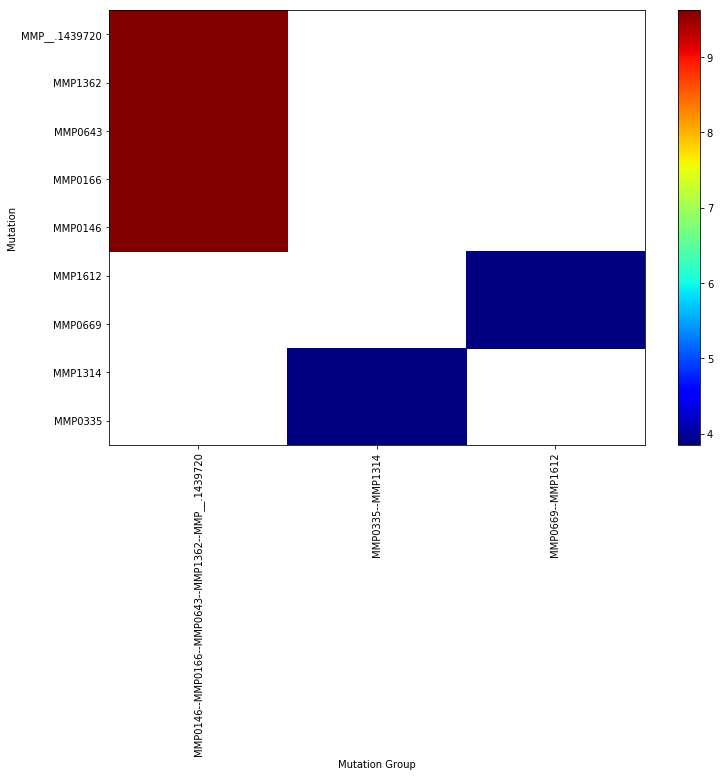

In [12]:
# Plot mutation groups
parms = PlotParms()
parms[cn.PLT_FIGSIZE] = (12, 8)
for species in [cn.SPECIES_MIX_DVH, cn.SPECIES_MIX_MMP]:
    collection = MutationCollection.makeMutationCollectionForLine(species=species)
    collection.plot(parms=parms)

In [13]:
# Find gene description
mutations = []
for group_of_group in makeMutationDict().values():
    group = []
    [group.extend(g) for g in group_of_group]
    mutations.extend(group)
mutations = list(set(mutations))
mutations.sort()
df_description = util.makeGeneDescriptionDF(mutations)
df_description = df_description.sort_values(cn.GGENE_ID)
df_description

NameError: name 'makeMutationDict' is not defined